In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.metrics import average_precision_score

import pycaret
from pycaret.classification import *
from infra_utils import get_raw_data

In [2]:
data_file = ('dataset' +  os.path.sep +  'creditcard.csv')
data_file

'dataset\\creditcard.csv'

In [3]:
df = pd.read_csv(data_file)

In [4]:
df_train, df_test = get_raw_data(df)

In [6]:
# df_train.head(2)

In [5]:
%%time
clf1 = pycaret.classification.setup(data=df_train,
                                    target='target',
                                     verbose=False,
                                     log_experiment=True,
                                     use_gpu=False,
                                     experiment_name='selected_model',
                                     fix_imbalance=True,
                                     #transformation=True,
                                     polynomial_features=True
                                    )


pycaret.classification.add_metric('apc', 'APC', average_precision_score, target='pred_proba')

best_model = pycaret.classification.compare_models(sort='APC',
                                                   # include=['lightgbm', 'et', 'rf', 'lr', 'gbc'],
                                                   include=['et', 'rf', 'lr', 'gbc'],
                                                   probability_threshold=0.5
                                                  )


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9699,0.9835,0.8794,0.9123,0.8932,0.8758,0.8775,0.9576,14.4200
et,Extra Trees Classifier,0.9770,0.9821,0.8662,0.9728,0.9136,0.9005,0.9042,0.9515,1.5550
rf,Random Forest Classifier,0.9757,0.9780,0.8704,0.9608,0.9097,0.8958,0.8995,0.9469,0.9240
lr,Logistic Regression,0.9668,0.9563,0.8751,0.8930,0.8822,0.8629,0.8641,0.9248,1.3130


2024/08/02 17:52:39 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 17:52:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 17:52:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 17:52:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


CPU times: total: 1min 24s
Wall time: 4min 26s


In [6]:
best_model

CustomProbabilityThresholdClassifier(ccp_alpha=0.0,
                                     classifier=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                           criterion='friedman_mse',
                                                                           init=None,
                                                                           learning_rate=0.1,
                                                                           loss='log_loss',
                                                                           max_depth=3,
                                                                           max_features=None,
                                                                           max_leaf_nodes=None,
                                                                           min_impurity_decrease=0.0,
                                                                           min_samples_leaf=1,
                                                                           min_samples_split=2,
                                                                           min_weight_fraction_leaf=0.0,
                                                                           n_estimators=100,
                                                                           n_iter_no_change=...
                                     criterion='friedman_mse', init=None,
                                     learning_rate=0.1, loss='log_loss',
                                     max_depth=3, max_features=None,
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_iter_no_change=None,
                                     probability_threshold=0.5,
                                     random_state=1220, subsample=1.0,
                                     tol=0.0001, validation_fraction=0.1,
                                     verbose=0, warm_start=False)

In [7]:
pycaret.classification.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

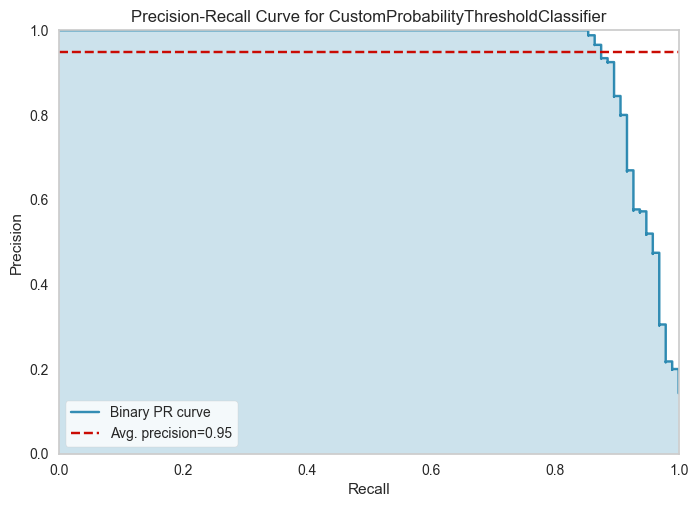

In [8]:
plot_model(best_model, plot='pr')

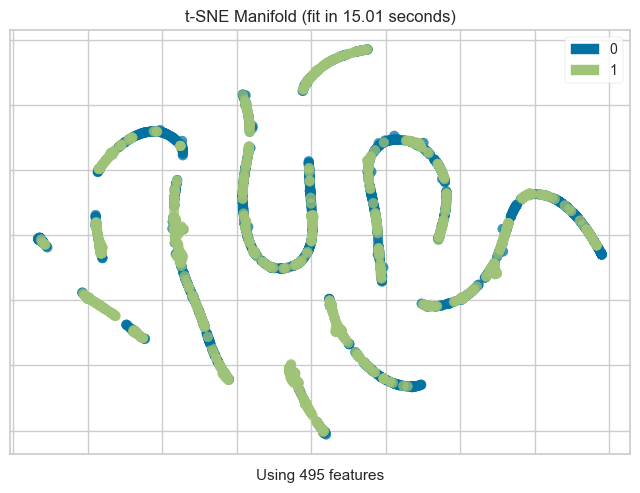

In [9]:
plot_model(best_model, 'manifold')

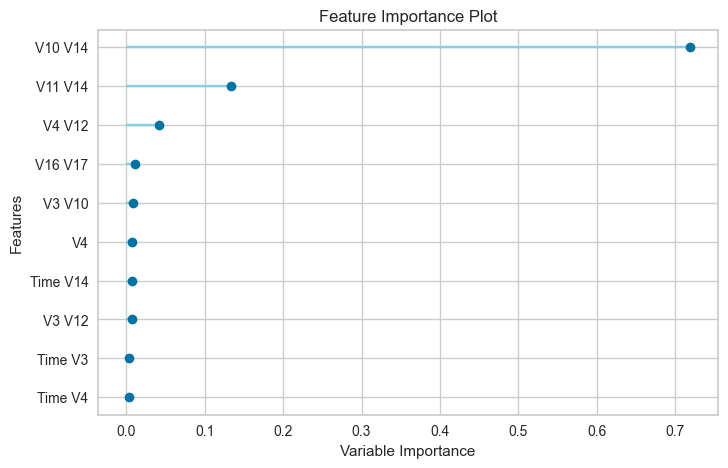

In [11]:
plot_model(best_model, plot='feature')